IMPORTING NECCESSARY MODULE

In [1]:
import pandas as pd
from matplotlib import style
import matplotlib.pyplot as plt
import wordcloud
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
# deep leanring transformation 
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
# visualizaing various performance score 
from sklearn import metrics
import seaborn as sn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn import naive_bayes 
from sklearn import ensemble
from sklearn import metrics
import numpy as np 

# Laod Dataset

LOADING FAKE NEWS DATASET

In [2]:
fake_df = pd.read_csv('Fake.csv/Fake.csv')
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
fake_df.shape

(23481, 4)

LOADING READ NEWS DATASET

In [4]:
real_df = pd.read_csv('True.csv/True.csv')
real_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


CREATING TARGET VARIABLE FOR FAKE & REAL NEWS DATASET

In [5]:
fake_df['target'] = 0
real_df['target'] = 1

MERGING FAKE AND READ NEWS DATASET

In [6]:
data = pd.concat([fake_df, real_df], ignore_index=True, sort=True)
data.head()

,date,subject,target,text,title
0,"December 31, 2017",News,0,Donald Trump just couldn t wish all Americans ...,Donald Trump Sends Out Embarrassing New Year’...
1,"December 31, 2017",News,0,House Intelligence Committee Chairman Devin Nu...,Drunk Bragging Trump Staffer Started Russian ...
2,"December 30, 2017",News,0,"On Friday, it was revealed that former Milwauk...",Sheriff David Clarke Becomes An Internet Joke...
3,"December 29, 2017",News,0,"On Christmas day, Donald Trump announced that ...",Trump Is So Obsessed He Even Has Obama’s Name...
4,"December 25, 2017",News,0,Pope Francis used his annual Christmas Day mes...,Pope Francis Just Called Out Donald Trump Dur...


In [7]:
data.shape

(44898, 5)

In [8]:
# dataset shape 
row , col = data.shape
"Row {} : & Col: {}".format(row, col)

'Row 44898 : & Col: 5'

# Exploring Dataset

In [9]:
data.head(5)

,date,subject,target,text,title
0,"December 31, 2017",News,0,Donald Trump just couldn t wish all Americans ...,Donald Trump Sends Out Embarrassing New Year’...
1,"December 31, 2017",News,0,House Intelligence Committee Chairman Devin Nu...,Drunk Bragging Trump Staffer Started Russian ...
2,"December 30, 2017",News,0,"On Friday, it was revealed that former Milwauk...",Sheriff David Clarke Becomes An Internet Joke...
3,"December 29, 2017",News,0,"On Christmas day, Donald Trump announced that ...",Trump Is So Obsessed He Even Has Obama’s Name...
4,"December 25, 2017",News,0,Pope Francis used his annual Christmas Day mes...,Pope Francis Just Called Out Donald Trump Dur...


In [10]:
data.tail()

,date,subject,target,text,title
44893,"August 22, 2017",worldnews,1,BRUSSELS (Reuters) - NATO allies on Tuesday we...,'Fully committed' NATO backs new U.S. approach...
44894,"August 22, 2017",worldnews,1,"LONDON (Reuters) - LexisNexis, a provider of l...",LexisNexis withdrew two products from Chinese ...
44895,"August 22, 2017",worldnews,1,MINSK (Reuters) - In the shadow of disused Sov...,Minsk cultural hub becomes haven from authorities
44896,"August 22, 2017",worldnews,1,MOSCOW (Reuters) - Vatican Secretary of State ...,Vatican upbeat on possibility of Pope Francis ...
44897,"August 22, 2017",worldnews,1,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,Indonesia to buy $1.14 billion worth of Russia...


In [11]:
data.sample(5)

,date,subject,target,text,title
1363,"May 24, 2017",News,0,For a man who has spent his entire life fat-sh...,Trump Stunned As Pope Calls Him Fat To His Fa...
37013,"November 29, 2017",worldnews,1,ANKARA (Reuters) - President Tayyip Erdogan di...,Turkish President calls accusations of family ...
18293,"Jul 18, 2017",left-news,0,Comedian Mark Dice explores the influence so-c...,CHEVY CHASE ADMITS To Using Position At SNL To...
14175,"Apr 4, 2016",politics,0,President Barack Obama danced the night away i...,U.S. TAXPAYERS FOOT $1.4 MILLION BILL So Obama...
9291,"Dec 3, 2017",politics,0,Lack of leadership? How about pot calling the ...,Classless Obama Continues to Shamelessly Shado...


SHOW NUMBER OF ROWS AND COLUMN

In [12]:
# dataset shape 
row , col = data.shape
"Row {} : & Col: {}".format(row, col)

'Row 44898 : & Col: 5'

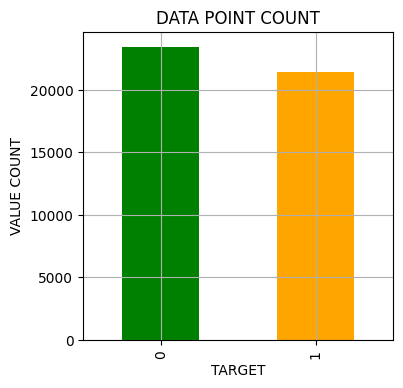

In [13]:
data.target.value_counts().plot(kind='bar', color=['green', 'orange'], figsize=(4,4))
plt.xlabel('TARGET')
plt.ylabel('VALUE COUNT')
plt.grid(True)
plt.title('DATA POINT COUNT')
plt.show()

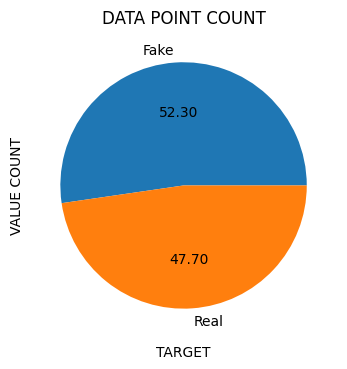

In [14]:
data.target.value_counts().plot(kind='pie' , figsize=(4,4), autopct='%.2f' ,  labels=['Fake', 'Real'])
plt.xlabel('TARGET')
plt.ylabel('VALUE COUNT')
plt.grid(True)
plt.title('DATA POINT COUNT')
plt.show()

Text(0.5, 1.0, 'Distribution of The Subject According to Real and Fake Data')

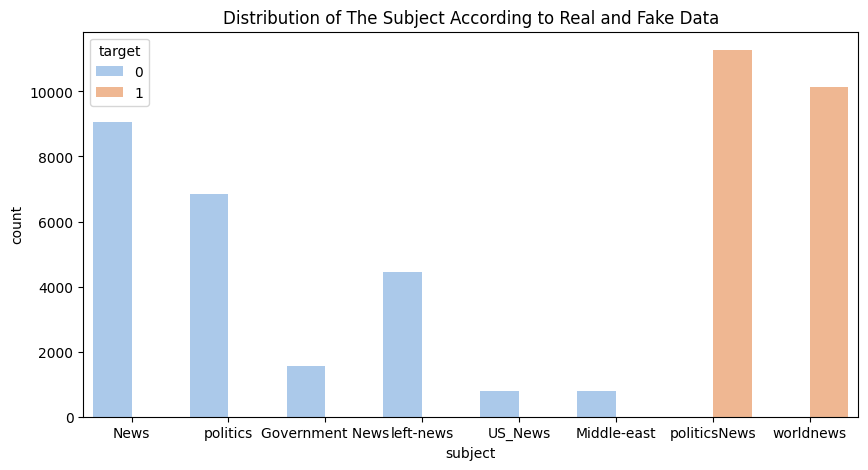

In [15]:
import seaborn as sns

plt.figure(figsize=(10, 5))
ax = sns.countplot(x="subject",  hue='target', data=data, palette="pastel")
plt.title("Distribution of The Subject According to Real and Fake Data")

In [16]:
data['text']= data['subject'] + " " + data['title'] + " " + data['text']
del data['title']
del data['subject']
del data['date']
data.head()

,target,text
0,0,News Donald Trump Sends Out Embarrassing New ...
1,0,News Drunk Bragging Trump Staffer Started Rus...
2,0,News Sheriff David Clarke Becomes An Internet...
3,0,News Trump Is So Obsessed He Even Has Obama’s...
4,0,News Pope Francis Just Called Out Donald Trum...


In [17]:
data.text[0]

'News  Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like 

In [18]:
# from bs4 import BeautifulSoup
# import re
# import nltk

# #Removal of HTML Contents
# def remove_html(text):
#     soup = BeautifulSoup(text, "html.parser")
#     return soup.get_text()

# #Removal of Punctuation Marks
# def remove_punctuations(text):
#     return re.sub('\[[^]]*\]', '', text)

# # Removal of Special Characters
# def remove_characters(text):
#     return re.sub("[^a-zA-Z]"," ",text)

# #Removal of stopwords 
# def remove_stopwords_and_lemmatization(text):
#     final_text = []
#     text = text.lower()
#     text = nltk.word_tokenize(text)
    
#     for word in text:
#         if word not in set(stopwords.words('english')):
#             lemma = nltk.WordNetLemmatizer()
#             word = lemma.lemmatize(word) 
#             final_text.append(word)
#     return " ".join(final_text)

# #Total function
# def cleaning(text):
#     text = remove_html(text)
#     text = remove_punctuations(text)
#     text = remove_characters(text)
#     text = remove_stopwords_and_lemmatization(text)
#     return text

# #Apply function on text column
# data['text']=data['text'].apply(cleaning)

In [19]:
import string

# remove new line character and special symbols
def clean_text(doc):
    doc = ''.join([d.replace('\n', '@').replace('—', '@') for d in doc])
    doc = ''.join([d.lower() for d in doc if d not in string.punctuation])
    doc = doc.split(' ')
   

#     token = word_tokenize(doc)
#     doc = [stemmer.stem(d) for d in token if not d in string.punctuation] 
#     doc = [d for d in doc if not d in st]
    
    return doc
data['text']=data['text'].apply(clean_text)
data.head()

,target,text
0,0,"[news, , donald, trump, sends, out, embarrassi..."
1,0,"[news, , drunk, bragging, trump, staffer, star..."
2,0,"[news, , sheriff, david, clarke, becomes, an, ..."
3,0,"[news, , trump, is, so, obsessed, he, even, ha..."
4,0,"[news, , pope, francis, just, called, out, don..."


In [21]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['target'], random_state=0)

In [22]:
print(X_train.shape)
print(X_test.shape)

(33673,)
(11225,)


In [72]:
X_train.shape

(33673,)

In [73]:
max_features = 10000
maxlen = 300

In [74]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
tokenized_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(tokenized_train, maxlen=maxlen)

In [75]:
tokenized_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(tokenized_test, maxlen=maxlen)

In [40]:
batch_size = 256
epochs = 10
embed_size = 100

model = tf.keras.Sequential()
#Non-trainable embeddidng layer
model.add(tf.keras.layers.Embedding(max_features, output_dim=embed_size, input_length=maxlen, trainable=False))
#LSTM 
model.add(tf.keras.layers.LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(tf.keras.layers.LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(tf.keras.layers.Dense(units = 32 , activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 300, 100)          1000000   
                                                                 
 lstm_4 (LSTM)               (None, 300, 128)          117248    
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,168,769
Trainable params: 168,769
Non-trainable params: 1,000,000
_________________________________________________________________


In [42]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=10, batch_size=batch_size, shuffle=True, verbose = 1)

Epoch 1/10
93/93 [==============================] - 1088s 12s/step - loss: 0.3924 - accuracy: 0.8329 - val_loss: 0.2340 - val_accuracy: 0.9118
Epoch 2/10
93/93 [==============================] - 2282s 25s/step - loss: 0.2293 - accuracy: 0.9149 - val_loss: 0.2165 - val_accuracy: 0.9203
Epoch 3/10
93/93 [==============================] - 3372s 36s/step - loss: 0.2232 - accuracy: 0.9157 - val_loss: 0.4399 - val_accuracy: 0.8823
Epoch 4/10
93/93 [==============================] - 2061s 22s/step - loss: 0.2193 - accuracy: 0.9222 - val_loss: 0.1387 - val_accuracy: 0.9559
Epoch 5/10
93/93 [==============================] - 2858s 31s/step - loss: 0.1387 - accuracy: 0.9521 - val_loss: 0.1218 - val_accuracy: 0.9583
Epoch 6/10
93/93 [==============================] - 3182s 34s/step - loss: 0.0889 - accuracy: 0.9684 - val_loss: 0.0816 - val_accuracy: 0.9689
Epoch 7/10
93/93 [==============================] - 2145s 23s/step - loss: 0.0689 - accuracy: 0.9751 - val_loss: 0.0544 - val_accuracy: 0.9815

In [49]:
# model.save('final_fake_news_detectionmodel.h5')

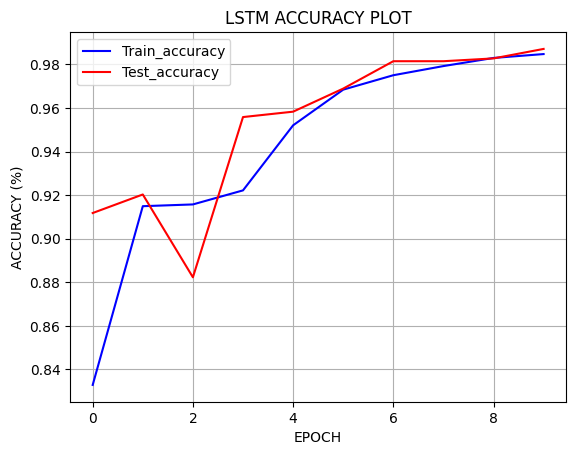

In [58]:
# ploting training accuracy and loss accuracy
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

plt.title('LSTM ACCURACY PLOT')
plt.plot(train_acc, label='Train_accuracy', color='blue')
plt.plot(test_acc, label='Test_accuracy', color='red')
plt.legend()
plt.grid(True)
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY (%)')
plt.show()

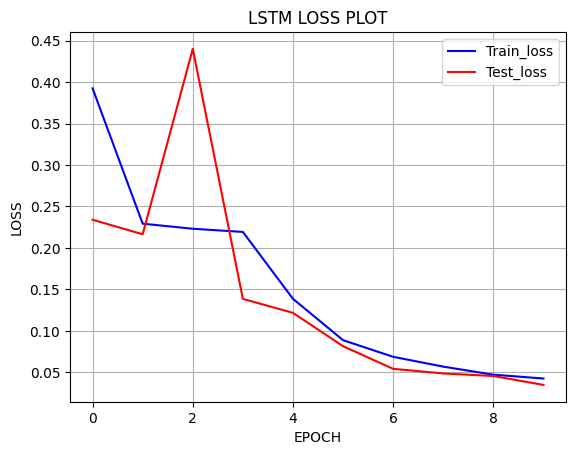

In [59]:
# ploting training accuracy and loss accuracy
train_acc = history.history['loss']
test_acc = history.history['val_loss']

plt.title('LSTM LOSS PLOT')
plt.plot(train_acc, label='Train_loss', color='blue')
plt.plot(test_acc, label='Test_loss', color='red')
plt.legend()
plt.grid(True)
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.show()

In [61]:
# making prediction
prediction = model.predict(X_test)

351/351 [==============================] - 77s 221ms/step


In [68]:
# convert continuous prediction to integer (0 and 1)
def normalize_prediction(prediction):
    predictions = []
    for predict in prediction: 
        if predict > 0.5: 
            predictions.append(1)
        else: 
            predictions.append(0)      
    return np.array(predictions)
        
    
norm_prediction = normalize_prediction(prediction)
norm_prediction

array([1, 1, 1, ..., 1, 1, 0])

In [70]:
acc = metrics.accuracy_score(norm_prediction, y_test)
prec = metrics.precision_score(norm_prediction, y_test)
recall = metrics.recall_score(norm_prediction, y_test)
f1 = metrics.f1_score(norm_prediction, y_test)

print('Overall Accuracy :  {}'.format(acc))
print('Overall Precision : {}'.format(prec))
print('Overall Recall :    {}'.format(recall))
print('Overall F1-score :  {}'.format(f1))


Overall Accuracy :  0.9865478841870824
Overall Precision : 0.9848569826135727
Overall Recall :    0.9868864743349569
Overall F1-score :  0.9858706840086086


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5887
           1       0.98      0.99      0.99      5338

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



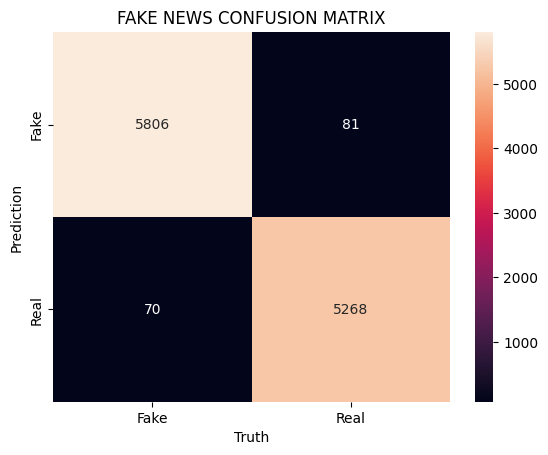

In [76]:
# visualizing performance 

# classification report
cr_report = metrics.classification_report(norm_prediction, y_test)

# confusion matrix
cf_report = metrics.confusion_matrix(norm_prediction, y_test)

print(cr_report)


# print(cr_report.ravel())
labels = ['Fake', 'Real']
plt.title('FAKE NEWS CONFUSION MATRIX')
sn.heatmap(cf_report, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Truth')
plt.ylabel('Prediction')
plt.show()


# Vectorization

In [22]:
xtrain = [' '.join(x) for x in X_train]
xtest = [' '.join(x) for x in X_test]

In [23]:
tf_vector = TfidfVectorizer()
x_train_fit = tf_vector.fit_transform(xtrain)
x_test_fit = tf_vector.fit(xtest)
# x_train_fit.shape

## SVM MODEL

In [78]:
X_train

array([[   0,    0,    0, ...,  706,   48,  311],
       [   0,    0,    0, ...,    3,    3,    3],
       [ 961,    1, 4058, ..., 9339,    3,    3],
       ...,
       [   0,    0,    0, ..., 3184,  557,    3],
       [   5,  542,   21, ...,    3,    3,    3],
       [6498,    7,    1, ...,  113, 1322, 1406]])

In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

In [ ]:
# training accuracy score.. 
svm_model.score(X_train, y_train)

In [ ]:
import joblib as jb 
# saving the machine learning model (SVM)
jb.dump('svm_fake_news_classifier', svm_model)

In [ ]:
svm_predict = svm_model.predict(X_test)
svm_predictions = normalize_prediction(svm_predict)

In [ ]:
acc = metrics.accuracy_score(svm_predictions, y_test)
prec = metrics.precision_score(svm_predictions, y_test)
recall = metrics.recall_score(svm_predictions, y_test)
f1 = metrics.f1_score(svm_predictions, y_test)

print('Overall Accuracy :  {}'.format(acc))
print('Overall Precision : {}'.format(prec))
print('Overall Recall :    {}'.format(recall))
print('Overall F1-score :  {}'.format(f1))


In [32]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['target'], random_state=0)

# TRADITIONAL MACHINE LEARNING 

## Naive Bayes ML

In [23]:
# taining naive bayesian algorithm
nb_model  = naive_bayes.GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [24]:
nb_model.score(X_train, y_train)
prediction = nb_model.predict(X_test)
prediction[:5]

array([0, 0, 1, 1, 0], dtype=int64)

In [25]:
cr = metrics.classification_report(prediction, y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.63      0.68      0.66      5483
           1       0.67      0.63      0.65      5742

    accuracy                           0.65     11225
   macro avg       0.65      0.65      0.65     11225
weighted avg       0.65      0.65      0.65     11225



# Decision Tree Model

In [24]:
from sklearn import tree
dt_model  = tree.DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_model.score(X_train, y_train)

1.0

In [25]:
dt_prediction = dt_model.predict(X_test)
cr = metrics.classification_report(dt_prediction, y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      6145
           1       0.88      0.93      0.90      5080

    accuracy                           0.91     11225
   macro avg       0.91      0.91      0.91     11225
weighted avg       0.91      0.91      0.91     11225



In [26]:
acc = metrics.accuracy_score(dt_prediction, y_test)
prec = metrics.precision_score(dt_prediction, y_test)
recall = metrics.recall_score(dt_prediction, y_test)
f1 = metrics.f1_score(dt_prediction, y_test)

print('Overall Accuracy :  {}'.format(acc))
print('Overall Precision : {}'.format(prec))
print('Overall Recall :    {}'.format(recall))
print('Overall F1-score :  {}'.format(f1))

Overall Accuracy :  0.9108240534521158
Overall Precision : 0.8812862217236866
Overall Recall :    0.9279527559055119
Overall F1-score :  0.9040176431105571


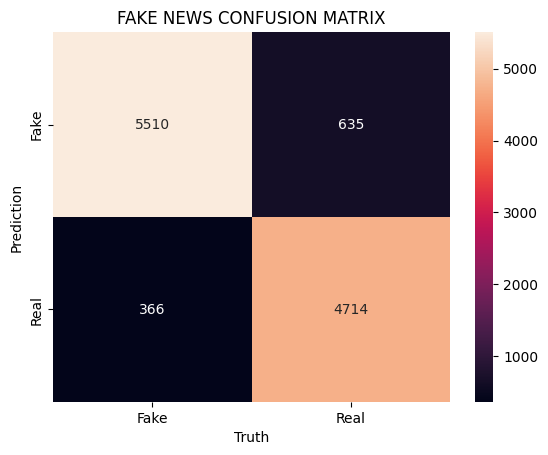

In [28]:
dt_cm = metrics.confusion_matrix(dt_prediction, y_test)
labels = ['Fake', 'Real']
plt.title('FAKE NEWS CONFUSION MATRIX')
sn.heatmap(dt_cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Truth')
plt.ylabel('Prediction')
plt.show()

# ENSEMBLE BASED MACHINE LEARNING

## Random forest 

In [26]:
rd_model = ensemble.RandomForestClassifier()
rd_model.fit(X_train, y_train)
rd_model.score(X_train, y_train)

1.0

In [28]:
rd_prediction = rd_model.predict(X_test)
acc = metrics.accuracy_score(rd_prediction, y_test)
prec = metrics.precision_score(rd_prediction, y_test)
recall = metrics.recall_score(rd_prediction, y_test)
f1 = metrics.f1_score(rd_prediction, y_test)

print('Overall Accuracy :  {}'.format(acc))
print('Overall Precision : {}'.format(prec))
print('Overall Recall :    {}'.format(recall))
print('Overall F1-score :  {}'.format(f1))

Overall Accuracy :  0.9438752783964365
Overall Precision : 0.9876612450925406
Overall Recall :    0.9035402770651616
Overall F1-score :  0.9437299035369775


              precision    recall  f1-score   support

           0       0.90      0.99      0.94      5378
           1       0.99      0.90      0.94      5847

    accuracy                           0.94     11225
   macro avg       0.95      0.95      0.94     11225
weighted avg       0.95      0.94      0.94     11225



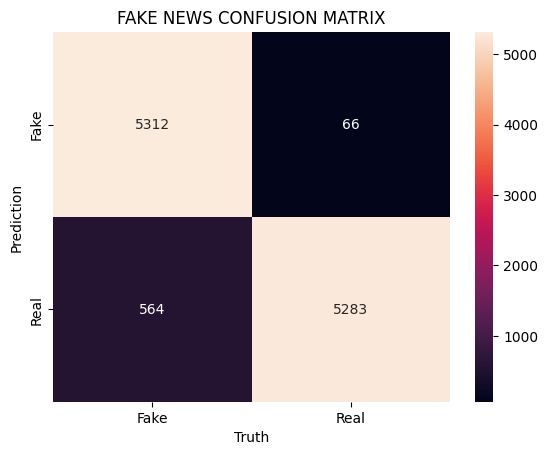

In [29]:
# nb_model.score(X_train, y_train)
# prediction = rd_model.predict(X_test)
cr = metrics.classification_report(rd_prediction, y_test)
print(cr)

ad_cm = metrics.confusion_matrix(rd_prediction, y_test)
labels = ['Fake', 'Real']
plt.title('FAKE NEWS CONFUSION MATRIX')
sn.heatmap(ad_cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Truth')
plt.ylabel('Prediction')
plt.show()

## SVM MODEL 

In [30]:
svm_model = svc.SVM()
svm_model.fit(X_train, y_train)
svm_model.score(X_train, y_train)

0.8940991298666587

In [31]:
svm_prediction = svm_model.predict(X_test)
acc = metrics.accuracy_score(svm_prediction, y_test)
prec = metrics.precision_score(svm_prediction, y_test)
recall = metrics.recall_score(svm_prediction, y_test)
f1 = metrics.f1_score(svm_prediction, y_test)

print('Overall Accuracy :  {}'.format(acc))
print('Overall Precision : {}'.format(prec))
print('Overall Recall :    {}'.format(recall))
print('Overall F1-score :  {}'.format(f1))

Overall Accuracy :  0.8864142538975501
Overall Precision : 0.9551318003365115
Overall Recall :    0.83154296875
Overall F1-score :  0.8890629078569564


              precision    recall  f1-score   support

           0       0.82      0.95      0.88      5081
           1       0.96      0.83      0.89      6144

    accuracy                           0.89     11225
   macro avg       0.89      0.89      0.89     11225
weighted avg       0.90      0.89      0.89     11225



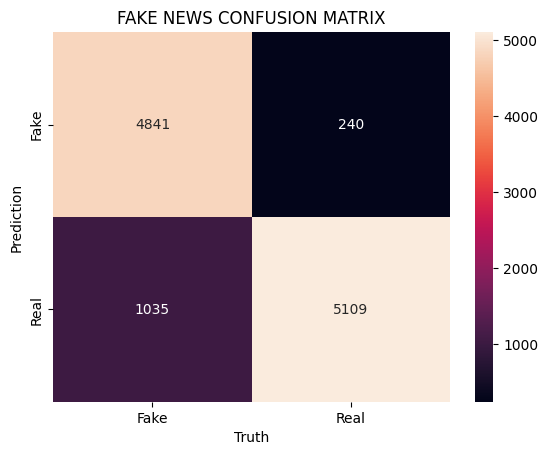

In [34]:
cr = metrics.classification_report(ada_prediction, y_test)
print(cr)

ad_cm = metrics.confusion_matrix(ada_prediction, y_test)
labels = ['Fake', 'Real']
plt.title('FAKE NEWS CONFUSION MATRIX')
sn.heatmap(ad_cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Truth')
plt.ylabel('Prediction')
plt.show()

## Gradient Boost Model

In [35]:
gd_classifir = ensemble.GradientBoostingClassifier() 
gd_model = gd_classifir.fit(X_train, y_train)
gd_model.score(X_train, y_train)

0.909333887684495

In [37]:
gd_prediction = gd_model.predict(X_test)
acc = metrics.accuracy_score(gd_prediction, y_test)
prec = metrics.precision_score(gd_prediction, y_test)
recall = metrics.recall_score(gd_prediction, y_test)
f1 = metrics.f1_score(gd_prediction, y_test)

print('Overall Accuracy :  {}'.format(acc))
print('Overall Precision : {}'.format(prec))
print('Overall Recall :    {}'.format(recall))

Overall Accuracy :  0.8996881959910913
Overall Precision : 0.9897177042437839
Overall Recall :    0.8317360565593087


              precision    recall  f1-score   support

           0       0.82      0.99      0.90      4860
           1       0.99      0.83      0.90      6365

    accuracy                           0.90     11225
   macro avg       0.90      0.91      0.90     11225
weighted avg       0.92      0.90      0.90     11225



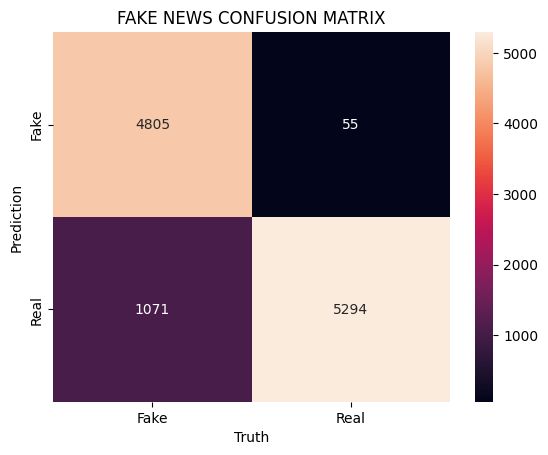

In [38]:
cr = metrics.classification_report(gd_prediction, y_test)
print(cr)

ad_cm = metrics.confusion_matrix(gd_prediction, y_test)
labels = ['Fake', 'Real']
plt.title('FAKE NEWS CONFUSION MATRIX')
sn.heatmap(ad_cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Truth')
plt.ylabel('Prediction')
plt.show()

## Bi-LSTM -Transer learning -2- ML (Experiment 2)

In [33]:
from keras.models import load_model

# load the pre-trained model
lstm_model = load_model('final_fake_news_detectionmodel.h5')
lstm_model.layers

In [34]:
lstm_output = lstm_model.predict(X_train)
lstm_output

1053/1053 [==============================] - 187s 176ms/step


array([[6.0293001e-05],
       [9.9960655e-01],
       [9.9519140e-01],
       ...,
       [9.9904495e-01],
       [9.9887896e-01],
       [3.8607312e-05]], dtype=float32)

In [81]:
embed = lstm_model.layers[0]
embed.embeddings

<tf.Variable 'embedding_2/embeddings:0' shape=(10000, 100) dtype=float32, numpy=
array([[ 0.0465088 ,  0.03293196, -0.03020169, ..., -0.01815703,
        -0.02597826, -0.04084246],
       [-0.01996782, -0.02266967, -0.00820607, ..., -0.01438831,
         0.0009959 ,  0.00511465],
       [ 0.01831331,  0.03502654,  0.04201753, ..., -0.03708228,
        -0.02851619,  0.04383538],
       ...,
       [ 0.04404405, -0.04729681,  0.02538775, ..., -0.01927553,
        -0.00779426, -0.0167811 ],
       [-0.03572649, -0.02300435,  0.03381861, ..., -0.04288974,
        -0.02693722,  0.00813024],
       [-0.02623539, -0.04409128,  0.00730344, ...,  0.0309795 ,
         0.04971119,  0.03959671]], dtype=float32)>

In [77]:
X_train.shape

(33673, 300)

In [90]:
lstm_output[0]

array([6.0293e-05], dtype=float32)

In [51]:
nb_model = naive_bayes.GaussianNB()
nb_model.fit(reshaped, y_train)

GaussianNB()

In [112]:
lstm_x_test = lstm_model.predict(X_test)
mb_prediction = nb_model.predict(lstm_x_test)

351/351 [==============================] - 65s 184ms/step


In [113]:
lstm_x_test

array([[9.9735600e-01],
       [9.9865860e-01],
       [9.9948978e-01],
       ...,
       [9.4517773e-01],
       [9.9731594e-01],
       [4.6234807e-05]], dtype=float32)

In [114]:
mb_prediction

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [115]:
upd_nb_report = metrics.classification_report(mb_prediction, y_test)
print(upd_nb_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5876
           1       0.99      0.99      0.99      5349

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [116]:
acc = metrics.accuracy_score(mb_prediction, y_test)
prec = metrics.precision_score(mb_prediction, y_test)
recall = metrics.recall_score(mb_prediction, y_test)
f1 = metrics.f1_score(mb_prediction, y_test)

print('Overall Accuracy :  {}'.format(acc))
print('Overall Precision : {}'.format(prec))
print('Overall Recall :    {}'.format(recall))
print('Overall F1-score :  {}'.format(f1))

Overall Accuracy :  0.9869933184855234
Overall Precision : 0.9863525892690223
Overall Recall :    0.9863525892690223
Overall F1-score :  0.9863525892690223
